AI for Medical Sciences and Psychology by Tshepo Chris Nokeri, Apress. 2022

# Chapter 8: Medical Records Categorization

This chapter sufficiently apprises a wholesome approach for realizing patterns in medical records by executing a linear discriminant analysis model. To begin with, it summarizes medical recording. Subsequently, it exhibits a technique of cleansing textual data by executing fundamental methods like regularization and TfidfVectorizer. Afterward, it executes the method to classify the medical specialty, then it assesses the extent to which it segregates classes.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
medical_records_data = pd.read_csv(r"C:\Users\i5 lenov\Desktop\Next_Chapter\source_code\medical_transcripts\medical_records.csv")
medical_records_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
medical_records_data.head()

,description,medical_specialty,sample_name,transcription,keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


# Exploratory Descriptive Analysis

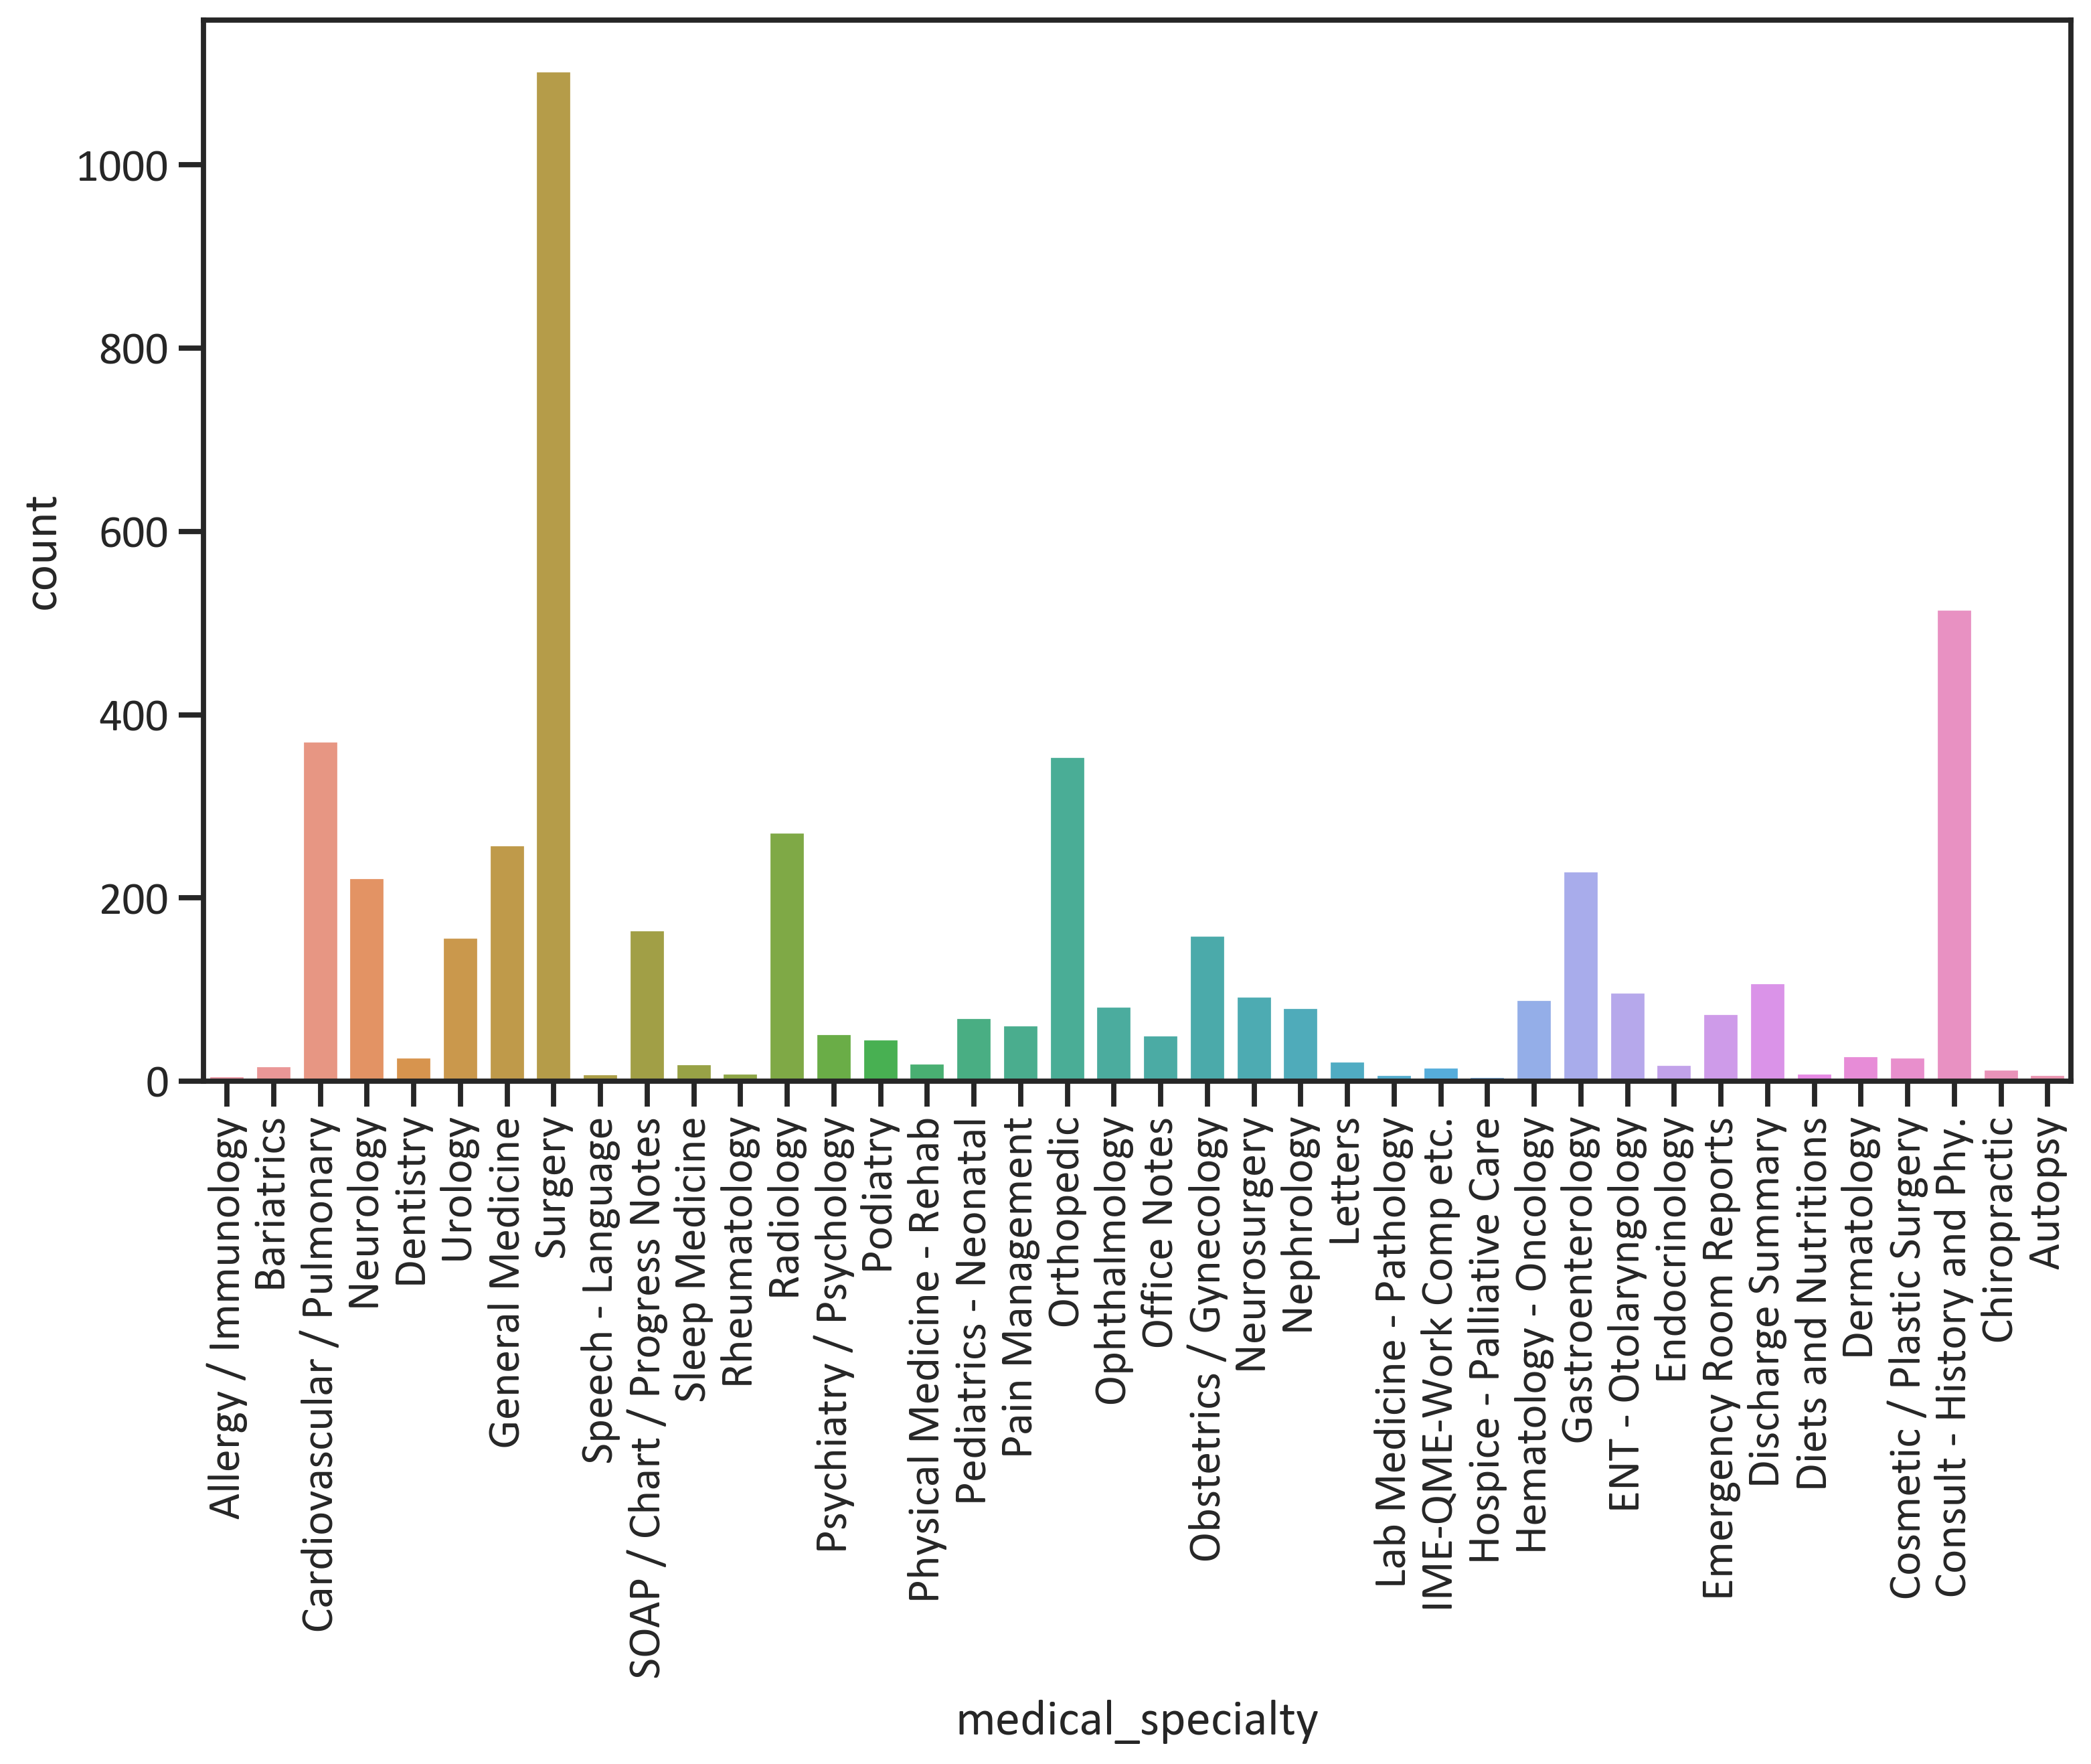

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set("talk","ticks",font_scale=1,font="Calibri")
from pylab import rcParams
plt.rcParams["figure.dpi"] = 300
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(medical_records_data["medical_specialty"], ax = ax)
plt.xticks (rotation=90) 
plt.show()

In [3]:
medical_specialty_group = pd.DataFrame(medical_records_data.groupby("medical_specialty").size())
medical_specialty_group.columns = ["Count"]
medical_specialty_group

,Count
medical_specialty,
Allergy / Immunology,7
Autopsy,8
Bariatrics,18
Cardiovascular / Pulmonary,372
Chiropractic,14
Consult - History and Phy.,516
Cosmetic / Plastic Surgery,27
Dentistry,27
Dermatology,29


# Preprocessing the Medical Records Data

In [4]:
ind_variables = medical_records_data[["description", "sample_name", "transcription", "keywords"]].values
labels = medical_records_data["medical_specialty"].values

# Executing Regular Expression

In [5]:
import re
clean_ind_variables = []
for sentence in range(len(ind_variables)):
    clean_ind_variable = re.sub(r'\W', ' ', str(ind_variables[sentence]))
    clean_ind_variable = re.sub(r'\s+[a-zA-Z]\s+', ' ', clean_ind_variable)
    clean_ind_variable = re.sub(r'\^[a-zA-Z]\s+', ' ', clean_ind_variable)
    clean_ind_variable = re.sub(r'\s+', ' ', clean_ind_variable, flags=re.I)
    clean_ind_variable = re.sub(r'b^\s+', ' ', clean_ind_variable)
    clean_ind_variable = clean_ind_variable.lower()
    clean_ind_variables.append(clean_ind_variable)

# Tokenizing Words

In [6]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500,
                             min_df=8,
                             max_df=0.7,
                             stop_words=stopwords.words("english"))
clean_ind_variables = vectorizer.fit_transform(clean_ind_variables).toarray()

# Executing the Linear Discriminant Analysis Model to Classify Patients’ Medical Records

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(clean_ind_variables, labels, test_size=0.2, random_state=0)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
linear_discriminant_model = LinearDiscriminantAnalysis()
linear_discriminant_model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [9]:
y_hat_linear_discriminant_model = linear_discriminant_model.predict(x_test)
actual_and_linear_discriminant_model_predictions = pd.DataFrame({"Actual Medical Specialty": y_test,
                                                                 "Predicted Medical Specialty": y_hat_linear_discriminant_model})
actual_and_linear_discriminant_model_predictions

,Actual Medical Specialty,Predicted Medical Specialty
0,Consult - History and Phy.,Neurology
1,Radiology,Radiology
2,Surgery,Surgery
3,Surgery,Surgery
4,ENT - Otolaryngology,ENT - Otolaryngology
...,...,...
995,Cardiovascular / Pulmonary,Cardiovascular / Pulmonary
996,Orthopedic,General Medicine
997,Surgery,Autopsy
998,Surgery,Bariatrics


# Considering the Linear Discriminant Analysis Model’s Performance

In [10]:
from sklearn import metrics
linear_discriminant_model_report = pd.DataFrame(metrics.classification_report(y_test,
                                                                              y_hat_linear_discriminant_model,
                                                                              output_dict=True)).transpose()
linear_discriminant_model_report

,precision,recall,f1-score,support
Allergy / Immunology,0.200000,1.000000,0.333333,1.000
Autopsy,0.018868,1.000000,0.037037,1.000
Bariatrics,0.000000,0.000000,0.000000,0.000
Cardiovascular / Pulmonary,0.571429,0.555556,0.563380,72.000
Chiropractic,0.000000,0.000000,0.000000,1.000
Consult - History and Phy.,0.421053,0.273504,0.331606,117.000
Cosmetic / Plastic Surgery,0.454545,0.833333,0.588235,6.000
Dentistry,0.000000,0.000000,0.000000,1.000
Dermatology,0.000000,0.000000,0.000000,6.000
Diets and Nutritions,0.000000,0.000000,0.000000,0.000
